In [4]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
df = pd.read_csv('winequality_red.csv')

In [7]:
df.sort_values(by = 'quality', ascending = False, inplace = True)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8


In [9]:
list_of_columns = df.columns.values.tolist()
list_of_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

### Splitting the quality of wines into 3 groups (Low, Medium, & High) ----> pd.qcut ( )

In [10]:
wine_quality_groups = pd.qcut(df['quality'], 3, labels = ['Low', 'Medium', 'High'])

In [11]:
df['Quality Quartile'] = wine_quality_groups
df[['quality', 'Quality Quartile']].iloc[:5]

,quality,Quality Quartile
495,8,High
1403,8,High
390,8,High
1061,8,High
1202,8,High


In [12]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
value_counts = df['Quality Quartile'].value_counts()
value_counts

Low       744
Medium    638
High      217
Name: Quality Quartile, dtype: int64

### Examining the fractions of Low, Medium, and High quality wines

In [14]:
## Low Quality Wines

value_counts[0] / value_counts.sum()

0.4652908067542214

In [35]:
## Medium Quality Wines

value_counts[1] / value_counts.sum()

0.3989993746091307

In [36]:
## High Quality Wines

value_counts[2] / value_counts.sum()

0.1357098186366479

### Looking at the average predictor values for 'Low', 'Medium', and 'High' quality wines defined by pd.qcut

In [16]:
pivoted_quartile = pd.pivot_table(df, index = 'Quality Quartile', values = list_of_columns, aggfunc = median)
pivoted_quartile

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
Quality Quartile,,,,,,,,,,,,
Low,9.7,0.081,0.22,0.996935,7.8,14.0,3.31,5,2.2,0.58,45.0,0.59
Medium,10.5,0.078,0.26,0.996560,7.9,14.0,3.32,6,2.2,0.64,35.0,0.49
High,11.6,0.073,0.40,0.995720,8.7,11.0,3.27,7,2.3,0.74,27.0,0.37


### Plotting the top 5 most common 'citric acid' values from our data set -------> value_counts ( )

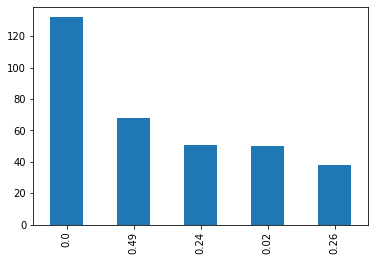

In [17]:
## plotting the top 5 most common citric acid values from our data set
top_citric_acid = df['citric acid'].value_counts().iloc[:5,].plot(kind = 'bar')

### Plotting the top 5 most common 'alcohol' values from our data set

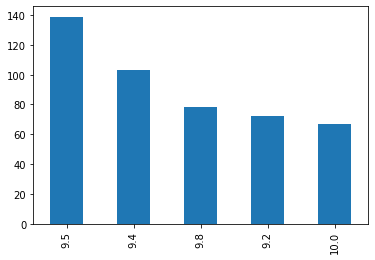

In [18]:
top_citric_acid = df['alcohol'].value_counts().iloc[:5,].plot(kind = 'bar')

### Box plots for each of the predictors

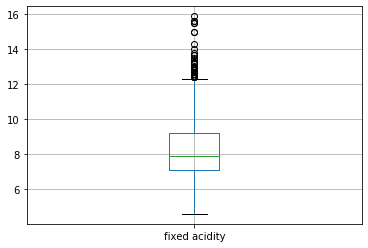

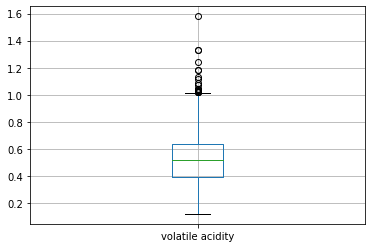

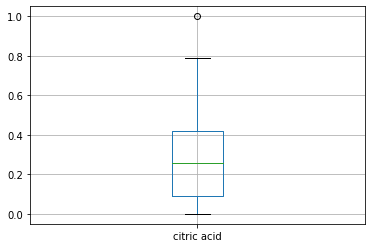

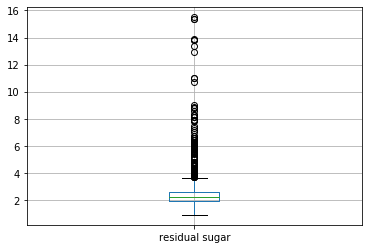

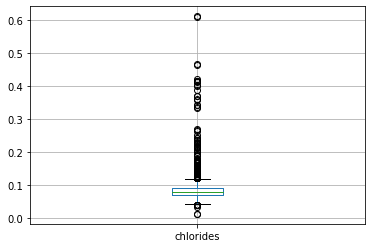

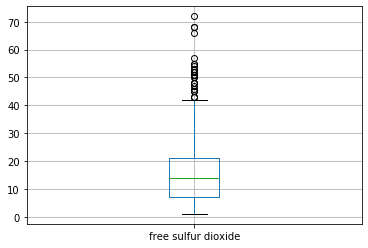

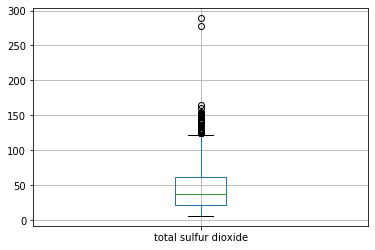

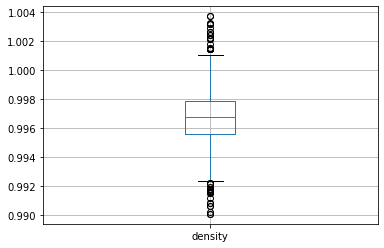

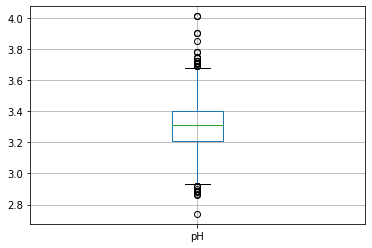

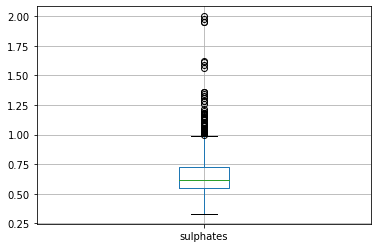

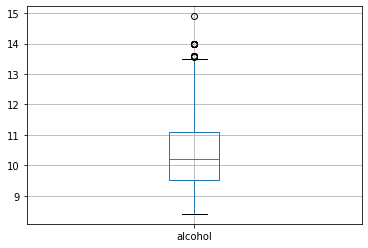

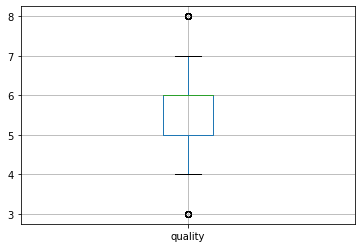

In [19]:
for predictor in list_of_columns:
    df.boxplot(column = predictor)
    show()

###  Median predictor values for each wine quality ------> pd.pivot_table ( )

In [20]:
## the average predictor values for each wine quality
pivoted_median = pd.pivot_table(df, index = 'quality', values = list_of_columns, aggfunc = median)
pivoted_median.iloc[:20, :11]

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.925,0.0905,0.035,0.997565,7.50,6.0,3.39,2.1,0.545,15.0,0.845
4,10.000,0.0800,0.090,0.996500,7.50,11.0,3.37,2.1,0.560,26.0,0.670
5,9.700,0.0810,0.230,0.997000,7.80,15.0,3.30,2.2,0.580,47.0,0.580
6,10.500,0.0780,0.260,0.996560,7.90,14.0,3.32,2.2,0.640,35.0,0.490
7,11.500,0.0730,0.400,0.995770,8.80,11.0,3.28,2.3,0.740,27.0,0.370
8,12.150,0.0705,0.420,0.994940,8.25,7.5,3.23,2.1,0.740,21.5,0.370


### Examining the relationships between the predictor variables (**median values) and the wine quality

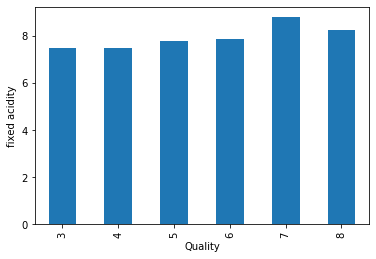

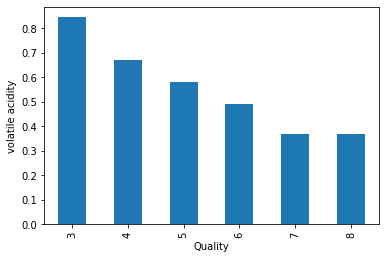

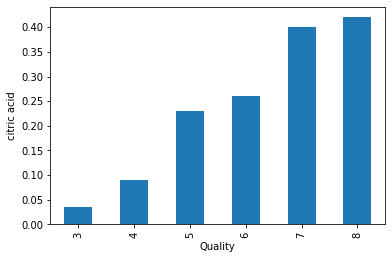

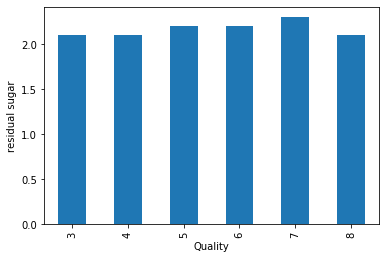

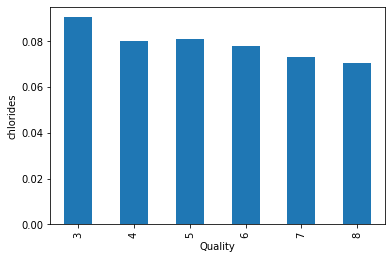

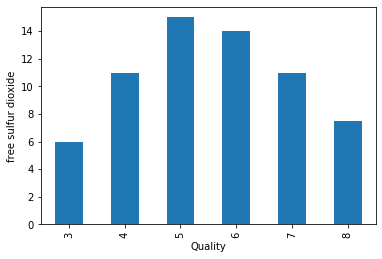

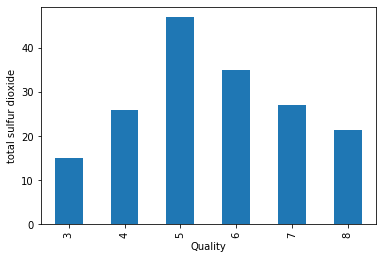

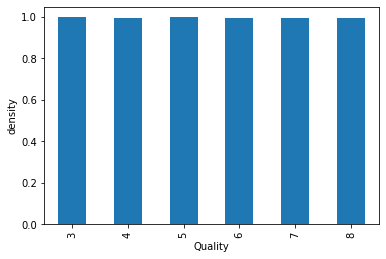

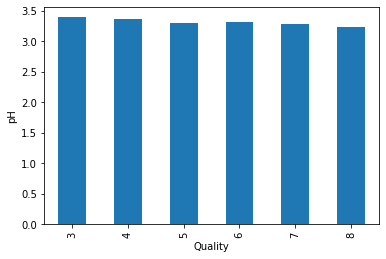

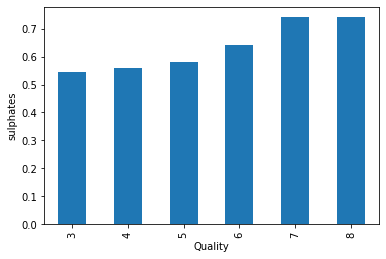

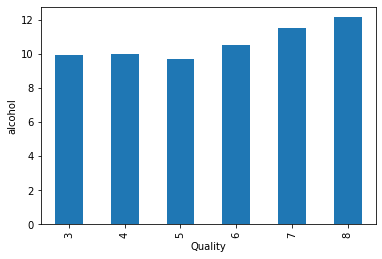

In [21]:
for predictor in list_of_columns[:-1]:
    pivoted_median[predictor].plot(kind = 'bar')
    xlabel('Quality')
    ylabel(predictor)
    show()

*The bar charts plotted above indicate that "volatile acidity" and "citric acid" have the strongest correlations with wine quality, 

*whereas "residual sugar", "density", "pH" have the weakest correlations with wine quality.

*Additionally, it seems that "total sulfur dioxide" and "free sulfur dioxide" have normal distributions relating to wine quality

### Minimum predictor values for each wine quality

In [22]:
## the minimum predictor values for each wine quality
pivoted_mins = pd.pivot_table(df, index = 'quality', values = list_of_columns, aggfunc = min)
pivoted_mins.iloc[:20, :11]

,Quality Quartile,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide
quality,,,,,,,,,,,
3,Low,8.4,0.061,0.00,0.99471,6.7,3.0,3.16,1.2,0.40,9.0
4,Low,9.0,0.045,0.00,0.99340,4.6,3.0,2.74,1.3,0.33,7.0
5,Low,8.5,0.039,0.00,0.99256,5.0,3.0,2.88,1.2,0.37,6.0
6,Medium,8.4,0.034,0.00,0.99007,4.7,1.0,2.86,0.9,0.40,6.0
7,High,9.2,0.012,0.00,0.99064,4.9,3.0,2.92,1.2,0.39,7.0
8,High,9.8,0.044,0.03,0.99080,5.0,3.0,2.88,1.4,0.63,12.0


### Maximum predictor values for each wine quality

In [23]:
## the maximum predictor values for each wine quality
pivoted_mins = pd.pivot_table(df, index = 'quality', values = list_of_columns, aggfunc = max)
pivoted_mins.iloc[:20, :11]

,Quality Quartile,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide
quality,,,,,,,,,,,
3,Low,11.0,0.267,0.66,1.00080,11.6,34.0,3.63,5.7,0.86,49.0
4,Low,13.1,0.610,1.00,1.00100,12.5,41.0,3.90,12.9,2.00,119.0
5,Low,14.9,0.611,0.79,1.00315,15.9,68.0,3.74,15.5,1.98,155.0
6,Medium,14.0,0.415,0.78,1.00369,14.3,72.0,4.01,15.4,1.95,165.0
7,High,14.0,0.358,0.76,1.00320,15.6,54.0,3.78,8.9,1.36,289.0
8,High,14.0,0.086,0.72,0.99880,12.6,42.0,3.72,6.4,1.10,88.0


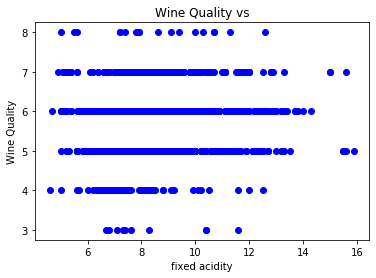

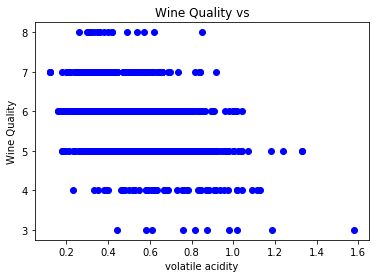

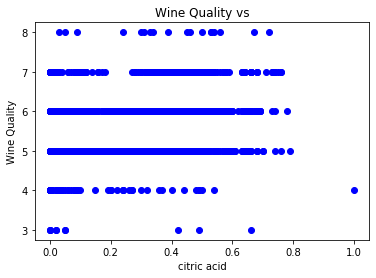

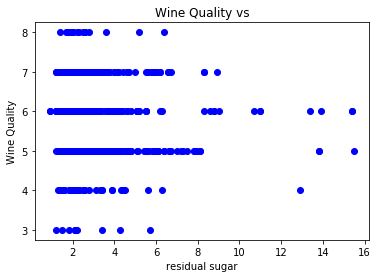

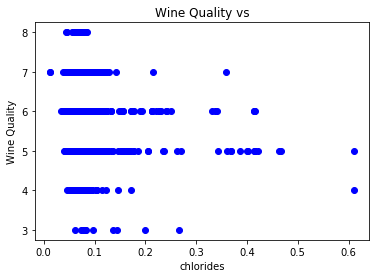

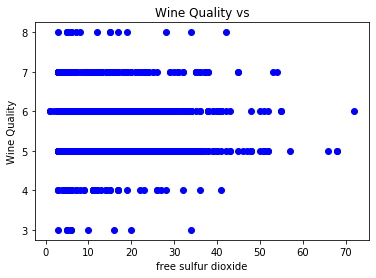

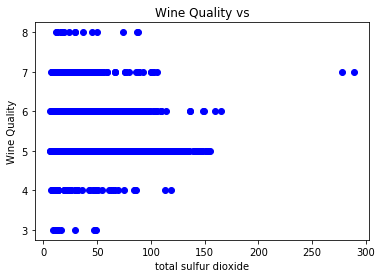

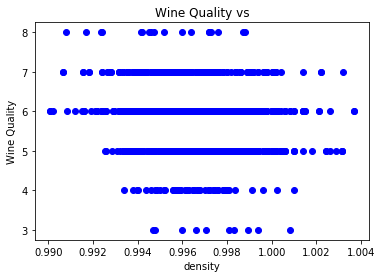

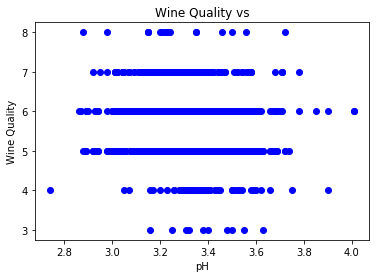

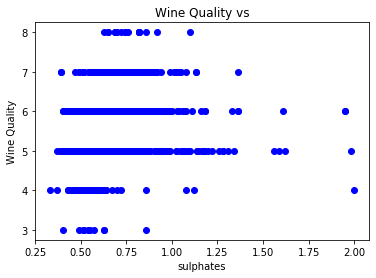

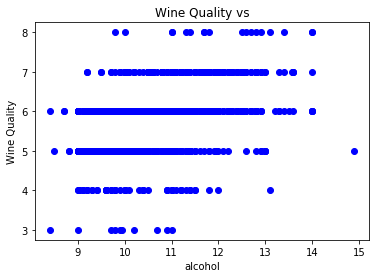

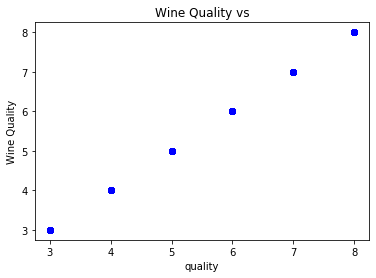

In [24]:
for predictor in df.columns.values[:-1]:
    plot(df[predictor], df['quality'], marker = 'o', color = 'blue', linestyle = 'None')
    xlabel(predictor)
    ylabel('Wine Quality')
    title('Wine Quality vs',)
    show()